# Algorithm 1 Data Combiner / Dimension Reducer

In [1]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #Can also try MinMaxScaler or MaxAbsScaler

SETUP

328 patches created with algorithm 1 loaded.
[4.59862216e+04 4.04835917e+04 1.89686126e+04 1.55893494e+04
 7.76834493e+03 7.16442754e+03 5.87881827e+03 4.95996069e+03
 4.41328503e+03 4.18167280e+03 3.85395565e+03 3.82260092e+03
 3.56981199e+03 3.22930217e+03 3.10951071e+03 2.92896020e+03
 2.52260703e+03 2.38747193e+03 2.23027820e+03 2.06210030e+03
 1.94299815e+03 1.88714990e+03 1.82435656e+03 1.74218290e+03
 1.70121720e+03 1.56024036e+03 1.52761313e+03 1.48245706e+03
 1.31852276e+03 1.21038597e+03 1.02209579e+03 9.92428726e+02
 9.77336215e+02 9.27582701e+02 8.03314374e+02 7.51233257e+02
 7.25119117e+02 7.07425776e+02 6.83361449e+02 6.70112861e+02
 6.49338578e+02 6.11657725e+02 5.64365559e+02 5.49653986e+02
 4.65804964e+02 4.46793486e+02 4.19284717e+02 3.86055829e+02
 3.72622499e+02 3.67663169e+02 3.53114974e+02 3.38854744e+02
 2.88686235e+02 2.66991225e+02 2.46800714e+02 2.46181046e+02
 2.33245186e+02 2.22705114e+02 2.16874192e+02 2.14509850e+02
 2.13916610e+02 2.09203421e+02 2.0348846

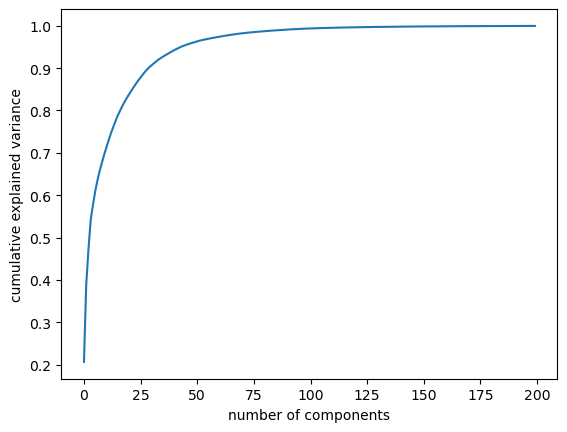

In [2]:
#open directory with the spectrograms and audio data.
used_raw_data = True

os.chdir('..')
os.chdir('./data/')

SampleFeatures = pd.read_csv('SampleSpectra1.csv', index_col = 0)

if used_raw_data:
    SampleWav = pd.read_csv('SampleWav1.csv', index_col = 0)
    SampleFeatures = pd.concat([SampleFeatures, SampleWav], axis = 1, join = 'inner')
    del SampleWav

print(len(SampleFeatures),'patches created with algorithm 1 loaded.')

# Have to rescale before using PCA
scaler = StandardScaler()
SampleFeatures = scaler.fit_transform(SampleFeatures)

# To do: extract vectors of means and stdevs to transform input for prediction later.
# Recall Z-score formula: (x-m)/s. That's exactly what this has done.
os.chdir('..')
os.chdir('./models/')
np.savetxt('mean1.csv',scaler.mean_, delimiter = ',')
np.savetxt('scale1.csv',scaler.scale_, delimiter = ',') #stdev

pca = PCA(n_components = 200) # Has to be <= min(# samples, # features)
pca.fit(SampleFeatures)
ReducedFeatures = pca.transform(SampleFeatures)
print(pca.explained_variance_)
print('reduced shape ', ReducedFeatures.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

SAVING THIS PCA TO DISK

In [3]:
with open('pca1.pkl','wb') as export_file:
    pk.dump(pca, export_file)

# In training script and predictor program, use the following
# pca_reload = pk.load(open("pca.pkl",'rb'))
# result_new = pca_reload.transform(X)